In [232]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
warnings.simplefilter('ignore')
%matplotlib inline

In [233]:
loan = pd.read_csv('loan_table.csv', parse_dates = ['date'])
loan.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid
0,19454,investment,2012-03-15,0,NaN
1,496811,investment,2012-01-17,0,NaN
2,929493,other,2012-02-09,0,NaN
3,580653,other,2012-06-27,1,1.0
4,172419,business,2012-05-21,1,0.0


In [234]:
borrower = pd.read_csv('borrower_table.csv')
borrower.head()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1


In [235]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   loan_id       101100 non-null  int64         
 1   loan_purpose  101100 non-null  object        
 2   date          101100 non-null  datetime64[ns]
 3   loan_granted  101100 non-null  int64         
 4   loan_repaid   47654 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 3.9+ MB


In [236]:
borrower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 12 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   loan_id                                          101100 non-null  int64  
 1   is_first_loan                                    101100 non-null  int64  
 2   fully_repaid_previous_loans                      46153 non-null   float64
 3   currently_repaying_other_loans                   46153 non-null   float64
 4   total_credit_card_limit                          101100 non-null  int64  
 5   avg_percentage_credit_card_limit_used_last_year  94128 non-null   float64
 6   saving_amount                                    101100 non-null  int64  
 7   checking_amount                                  101100 non-null  int64  
 8   is_employed                                      101100 non-null  int64  
 9   yearly_salary  

In [237]:
# choose the loan that we granted loan, 
data = loan.merge(borrower, how = 'left', on = 'loan_id')

In [238]:
data['loan_repaid'] = data['loan_repaid'].fillna(0)
data = data[data['loan_granted'] == 1]

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47654 entries, 3 to 101098
Data columns (total 16 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   loan_id                                          47654 non-null  int64         
 1   loan_purpose                                     47654 non-null  object        
 2   date                                             47654 non-null  datetime64[ns]
 3   loan_granted                                     47654 non-null  int64         
 4   loan_repaid                                      47654 non-null  float64       
 5   is_first_loan                                    47654 non-null  int64         
 6   fully_repaid_previous_loans                      21865 non-null  float64       
 7   currently_repaying_other_loans                   21865 non-null  float64       
 8   total_credit_card_limit            

In [240]:
# Bank's current profitability
data['loan_repaid'].sum()

30706.0

# Visualization

<AxesSubplot:xlabel='loan_purpose', ylabel='loan_repaid'>

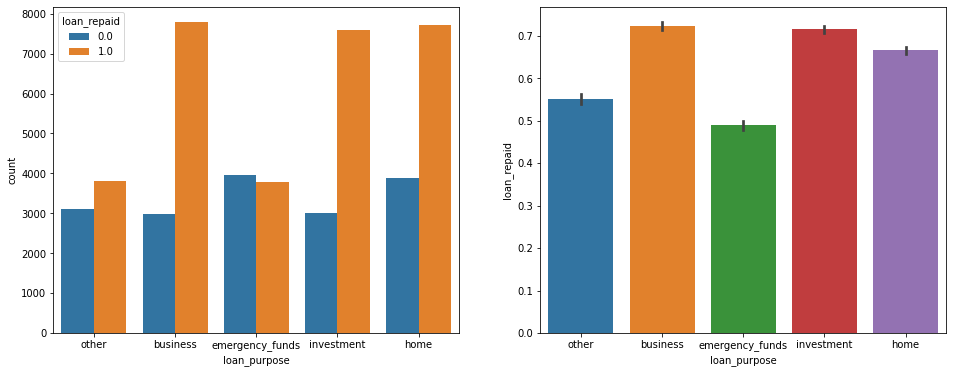

In [241]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x = 'loan_purpose' , hue= 'loan_repaid', data = data, ax = ax[0])
sns.barplot(x = 'loan_purpose' , y = 'loan_repaid', data = data, ax = ax[1])

<AxesSubplot:xlabel='is_first_loan', ylabel='loan_repaid'>

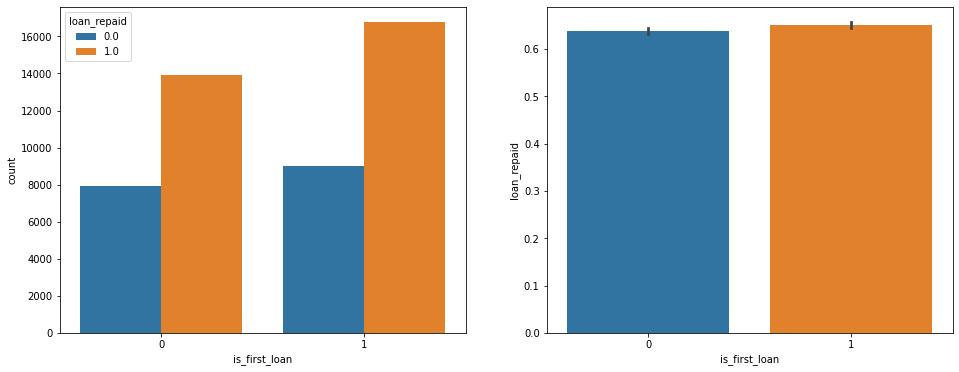

In [242]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x = 'is_first_loan' , hue= 'loan_repaid', data = data, ax = ax[0])
sns.barplot(x = 'is_first_loan' , y = 'loan_repaid', data = data, ax = ax[1])

<AxesSubplot:xlabel='fully_repaid_previous_loans', ylabel='loan_repaid'>

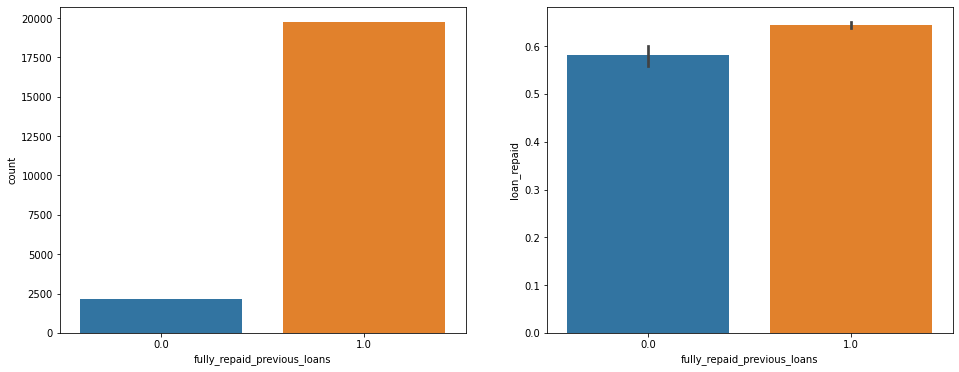

In [243]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x = 'fully_repaid_previous_loans' , data = data, ax = ax[0])
sns.barplot(x = 'fully_repaid_previous_loans' , y = 'loan_repaid', data = data, ax = ax[1])                     

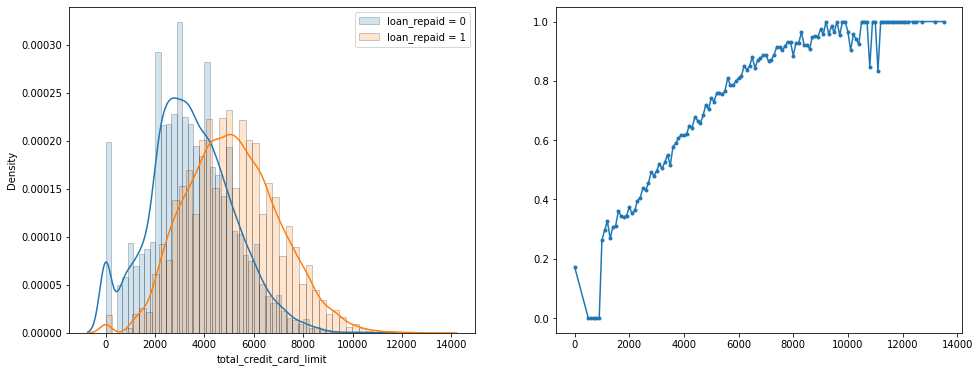

In [244]:
grouped = data[['total_credit_card_limit', 'loan_repaid']].groupby('total_credit_card_limit')
mean = grouped.mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.distplot(data[data['loan_repaid'] == 0]['total_credit_card_limit'], 
             label='loan_repaid = 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(data[data['loan_repaid'] == 1]['total_credit_card_limit'], 
             label='loan_repaid = 1', ax=ax[0], hist_kws=hist_kws)
ax[0].legend()
ax[1].plot(mean['total_credit_card_limit'], mean['loan_repaid'], '.-')

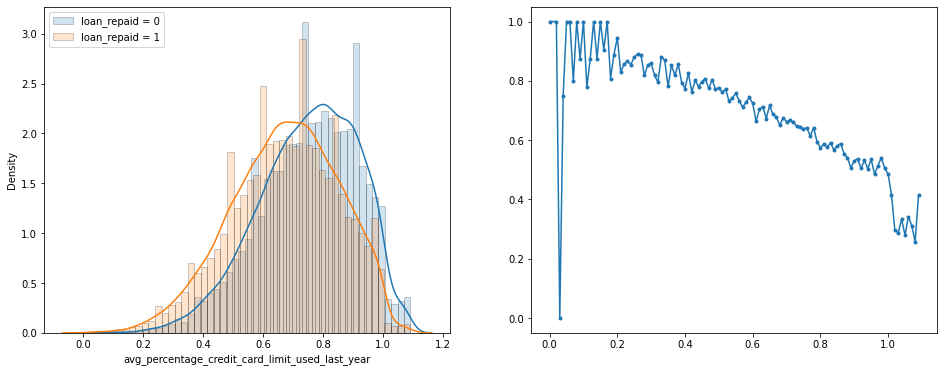

In [245]:
grouped = data[['avg_percentage_credit_card_limit_used_last_year', 'loan_repaid']].groupby('avg_percentage_credit_card_limit_used_last_year')
mean = grouped.mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.distplot(data[data['loan_repaid'] == 0]['avg_percentage_credit_card_limit_used_last_year'], 
             label='loan_repaid = 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(data[data['loan_repaid'] == 1]['avg_percentage_credit_card_limit_used_last_year'], 
             label='loan_repaid = 1', ax=ax[0], hist_kws=hist_kws)
ax[0].legend()
ax[1].plot(mean['avg_percentage_credit_card_limit_used_last_year'], mean['loan_repaid'], '.-')

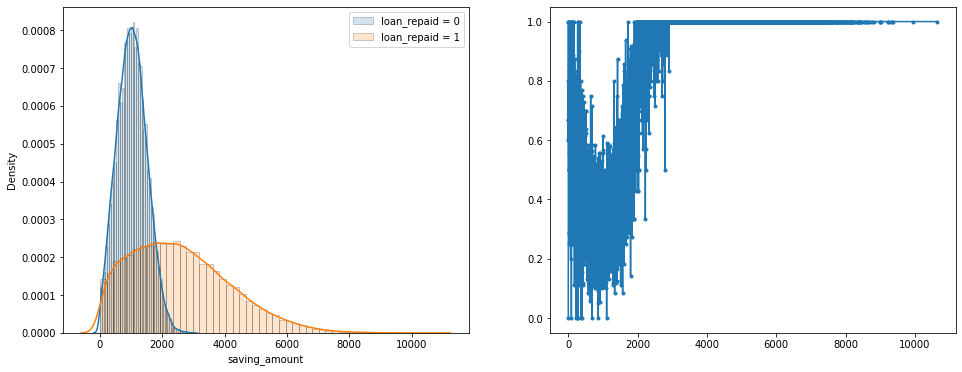

In [246]:
grouped = data[['saving_amount', 'loan_repaid']].groupby('saving_amount')
mean = grouped.mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.distplot(data[data['loan_repaid'] == 0]['saving_amount'], 
             label='loan_repaid = 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(data[data['loan_repaid'] == 1]['saving_amount'], 
             label='loan_repaid = 1', ax=ax[0], hist_kws=hist_kws)
ax[0].legend()
ax[1].plot(mean['saving_amount'], mean['loan_repaid'], '.-')

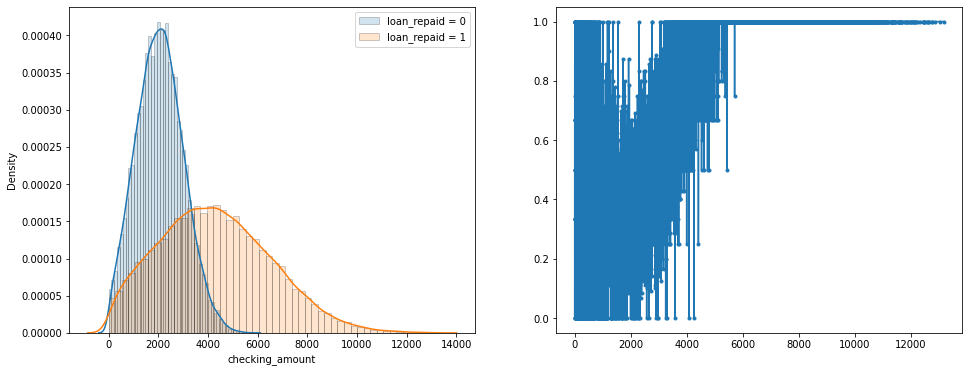

In [247]:
grouped = data[['checking_amount', 'loan_repaid']].groupby('checking_amount')
mean = grouped.mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.distplot(data[data['loan_repaid'] == 0]['checking_amount'], 
             label='loan_repaid = 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(data[data['loan_repaid'] == 1]['checking_amount'], 
             label='loan_repaid = 1', ax=ax[0], hist_kws=hist_kws)
ax[0].legend()
ax[1].plot(mean['checking_amount'], mean['loan_repaid'], '.-')

<AxesSubplot:xlabel='is_employed', ylabel='loan_repaid'>

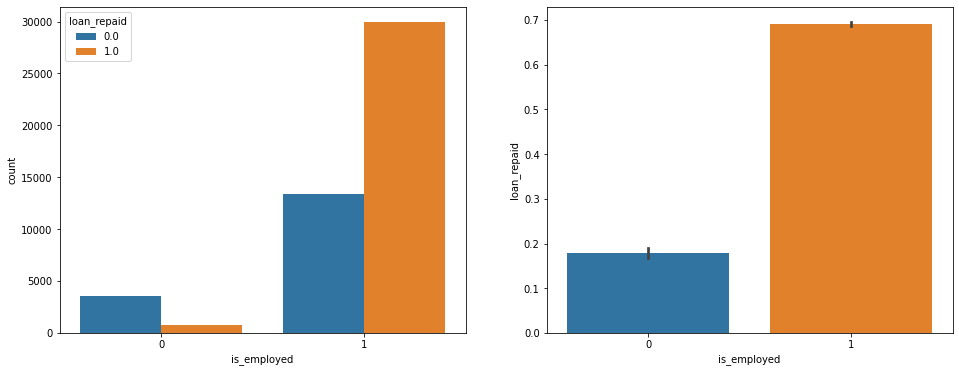

In [248]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x = 'is_employed' , hue = 'loan_repaid' , data = data, ax = ax[0])
sns.barplot(x = 'is_employed' , y = 'loan_repaid', data = data, ax = ax[1])                     

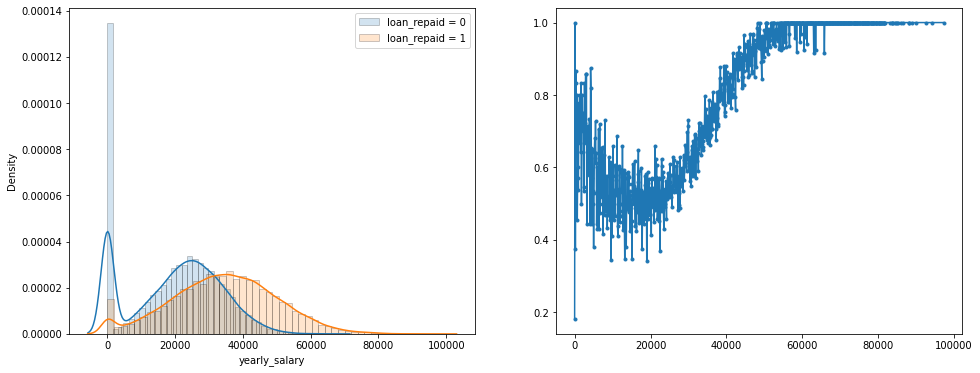

In [249]:
grouped = data[['yearly_salary', 'loan_repaid']].groupby('yearly_salary')
mean = grouped.mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.distplot(data[data['loan_repaid'] == 0]['yearly_salary'], 
             label='loan_repaid = 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(data[data['loan_repaid'] == 1]['yearly_salary'], 
             label='loan_repaid = 1', ax=ax[0], hist_kws=hist_kws)
ax[0].legend()
ax[1].plot(mean['yearly_salary'], mean['loan_repaid'], '.-')

<AxesSubplot:xlabel='age', ylabel='loan_repaid'>

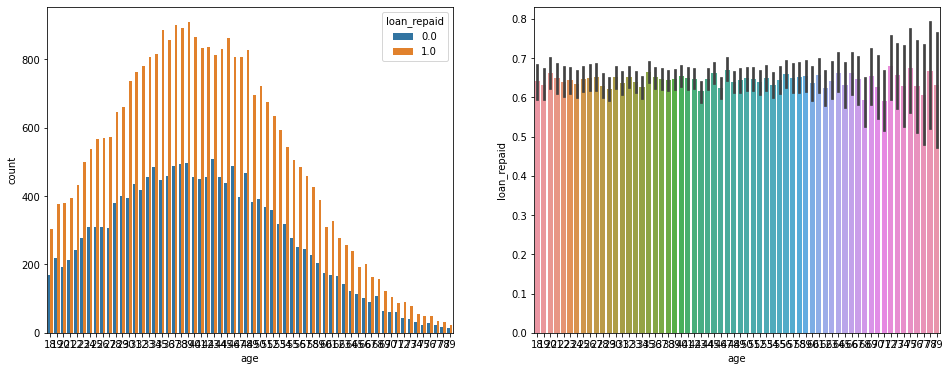

In [250]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x = 'age' , hue = 'loan_repaid' , data = data, ax = ax[0])
sns.barplot(x = 'age' , y = 'loan_repaid', data = data, ax = ax[1])  

<AxesSubplot:xlabel='dependent_number', ylabel='loan_repaid'>

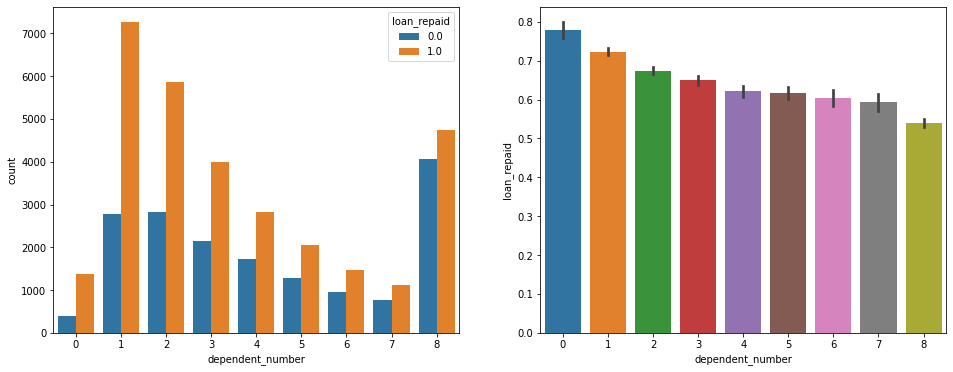

In [251]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x = 'dependent_number' , hue = 'loan_repaid' , data = data, ax = ax[0])
sns.barplot(x = 'dependent_number' , y = 'loan_repaid', data = data, ax = ax[1])  

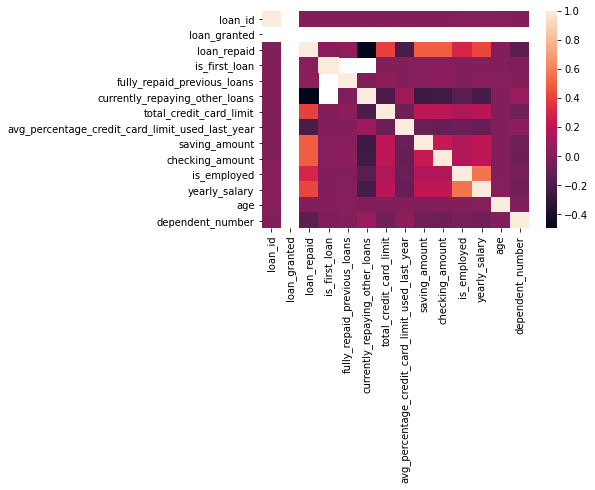

In [252]:
sns.heatmap(data.corr())
plt.show()

# Feature Engineering

In [253]:
# Co-linearity between is_first_loan and fully_reapaid_revious_loan
#                between is_first_loan and current_repaying_other_loans
print(data[data['is_first_loan'] == 1]['fully_repaid_previous_loans'].unique())
print(data[data['is_first_loan'] == 1]['currently_repaying_other_loans'].unique())

[nan]
[nan]


In [254]:
data = data.fillna({'fully_repaid_previous_loans': -1, 'currently_repaying_other_loans': -1})

In [255]:
median = data['avg_percentage_credit_card_limit_used_last_year'].median()
data = data.fillna({'avg_percentage_credit_card_limit_used_last_year': median})

In [256]:
# Drop useless feature and possible data leakage feature loan_granted

In [342]:
final = data[['loan_purpose', 'loan_repaid', 'is_first_loan', 'fully_repaid_previous_loans','currently_repaying_other_loans',
             'total_credit_card_limit', 'avg_percentage_credit_card_limit_used_last_year', 'saving_amount', 'checking_amount', 'yearly_salary',
             'age', 'dependent_number', 'is_employed']]

In [343]:
le = LabelEncoder()
final['loan_purpose'] = le.fit_transform(final['loan_purpose'])

In [344]:
X = final.loc[:, final.columns != 'loan_repaid']
y = final['loan_repaid']

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [346]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [347]:
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)
y_pred_proba = rf.predict_proba(X_test)

In [348]:
features = final.columns
features = list(features)
features.remove('loan_repaid')
feature_importances = pd.DataFrame(rf.feature_importances_, index = features,columns=['importance']).sort_values('importance',ascending=False)

In [349]:
feature_importances = feature_importances.reset_index()

# Q1 & Q2
Build a model which is better than the bank model. For simplicity, assume that:
If you grant the loan and the it doesn't get repaid, you lose 1
If you grant the loan and the it does get repaid, you gain 1
If you don't grant the loan, you gain 0
Using the rules above, compare bank profitability vs your model profitability

In [350]:
# Bank current profit
y_test_copy = y_test.reset_index()
y_test_copy[y_test_copy['loan_repaid'] == 1].shape[0] - y_test_copy[y_test_copy['loan_repaid'] == 0].shape[0]

3472

In [351]:
def calculate_profit(loan_paid, probability, threshold):
    loan_granted = (probability > threshold).astype(int)
    loan_granted = [i[1] for i in loan_granted]
    profit = 0
    for i in range(len(loan_paid)):
        if loan_granted[i] == 1:
            if loan_paid[i] == 0:
                profit -= 1
            else:
                profit += 1
                
    return profit

In [352]:
thresholds = list(np.linspace(0, 1, 100))
profits = []
loan_paid = y_test.astype(int).values
for threshold in thresholds:
    profits.append(calculate_profit(loan_paid, y_pred_proba, threshold))

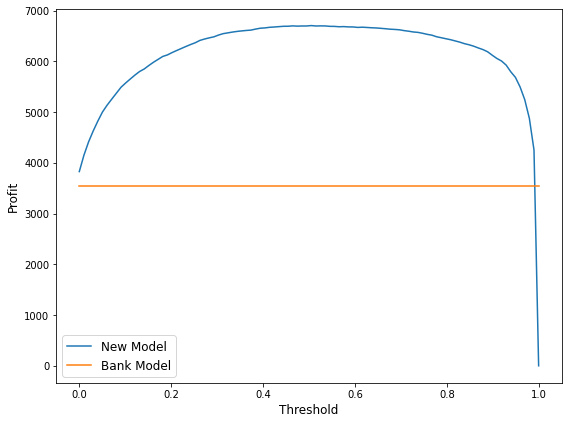

In [353]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(thresholds, profits, label='New Model')
ax.plot(thresholds, [bank_profit] * len(thresholds), label='Bank Model')
ax.set_xlabel('Threshold', fontsize=12)
ax.set_ylabel('Profit', fontsize=12)
ax.legend(fontsize=12)
plt.tight_layout()
plt.show()

As we can see, for mutiple threshold of granting the loan from 0.0 to 1.0, the random_forest model of grating loan made consistently more profit overall using our test data across the board.

# Q3
Describe the impact of the most important variables on the prediction. Also, focus on the
variable "is_employed", which describes whether the borrower is employed when she
asks for the loan. How does this variable impact the model? Explain why

<AxesSubplot:xlabel='index', ylabel='importance'>

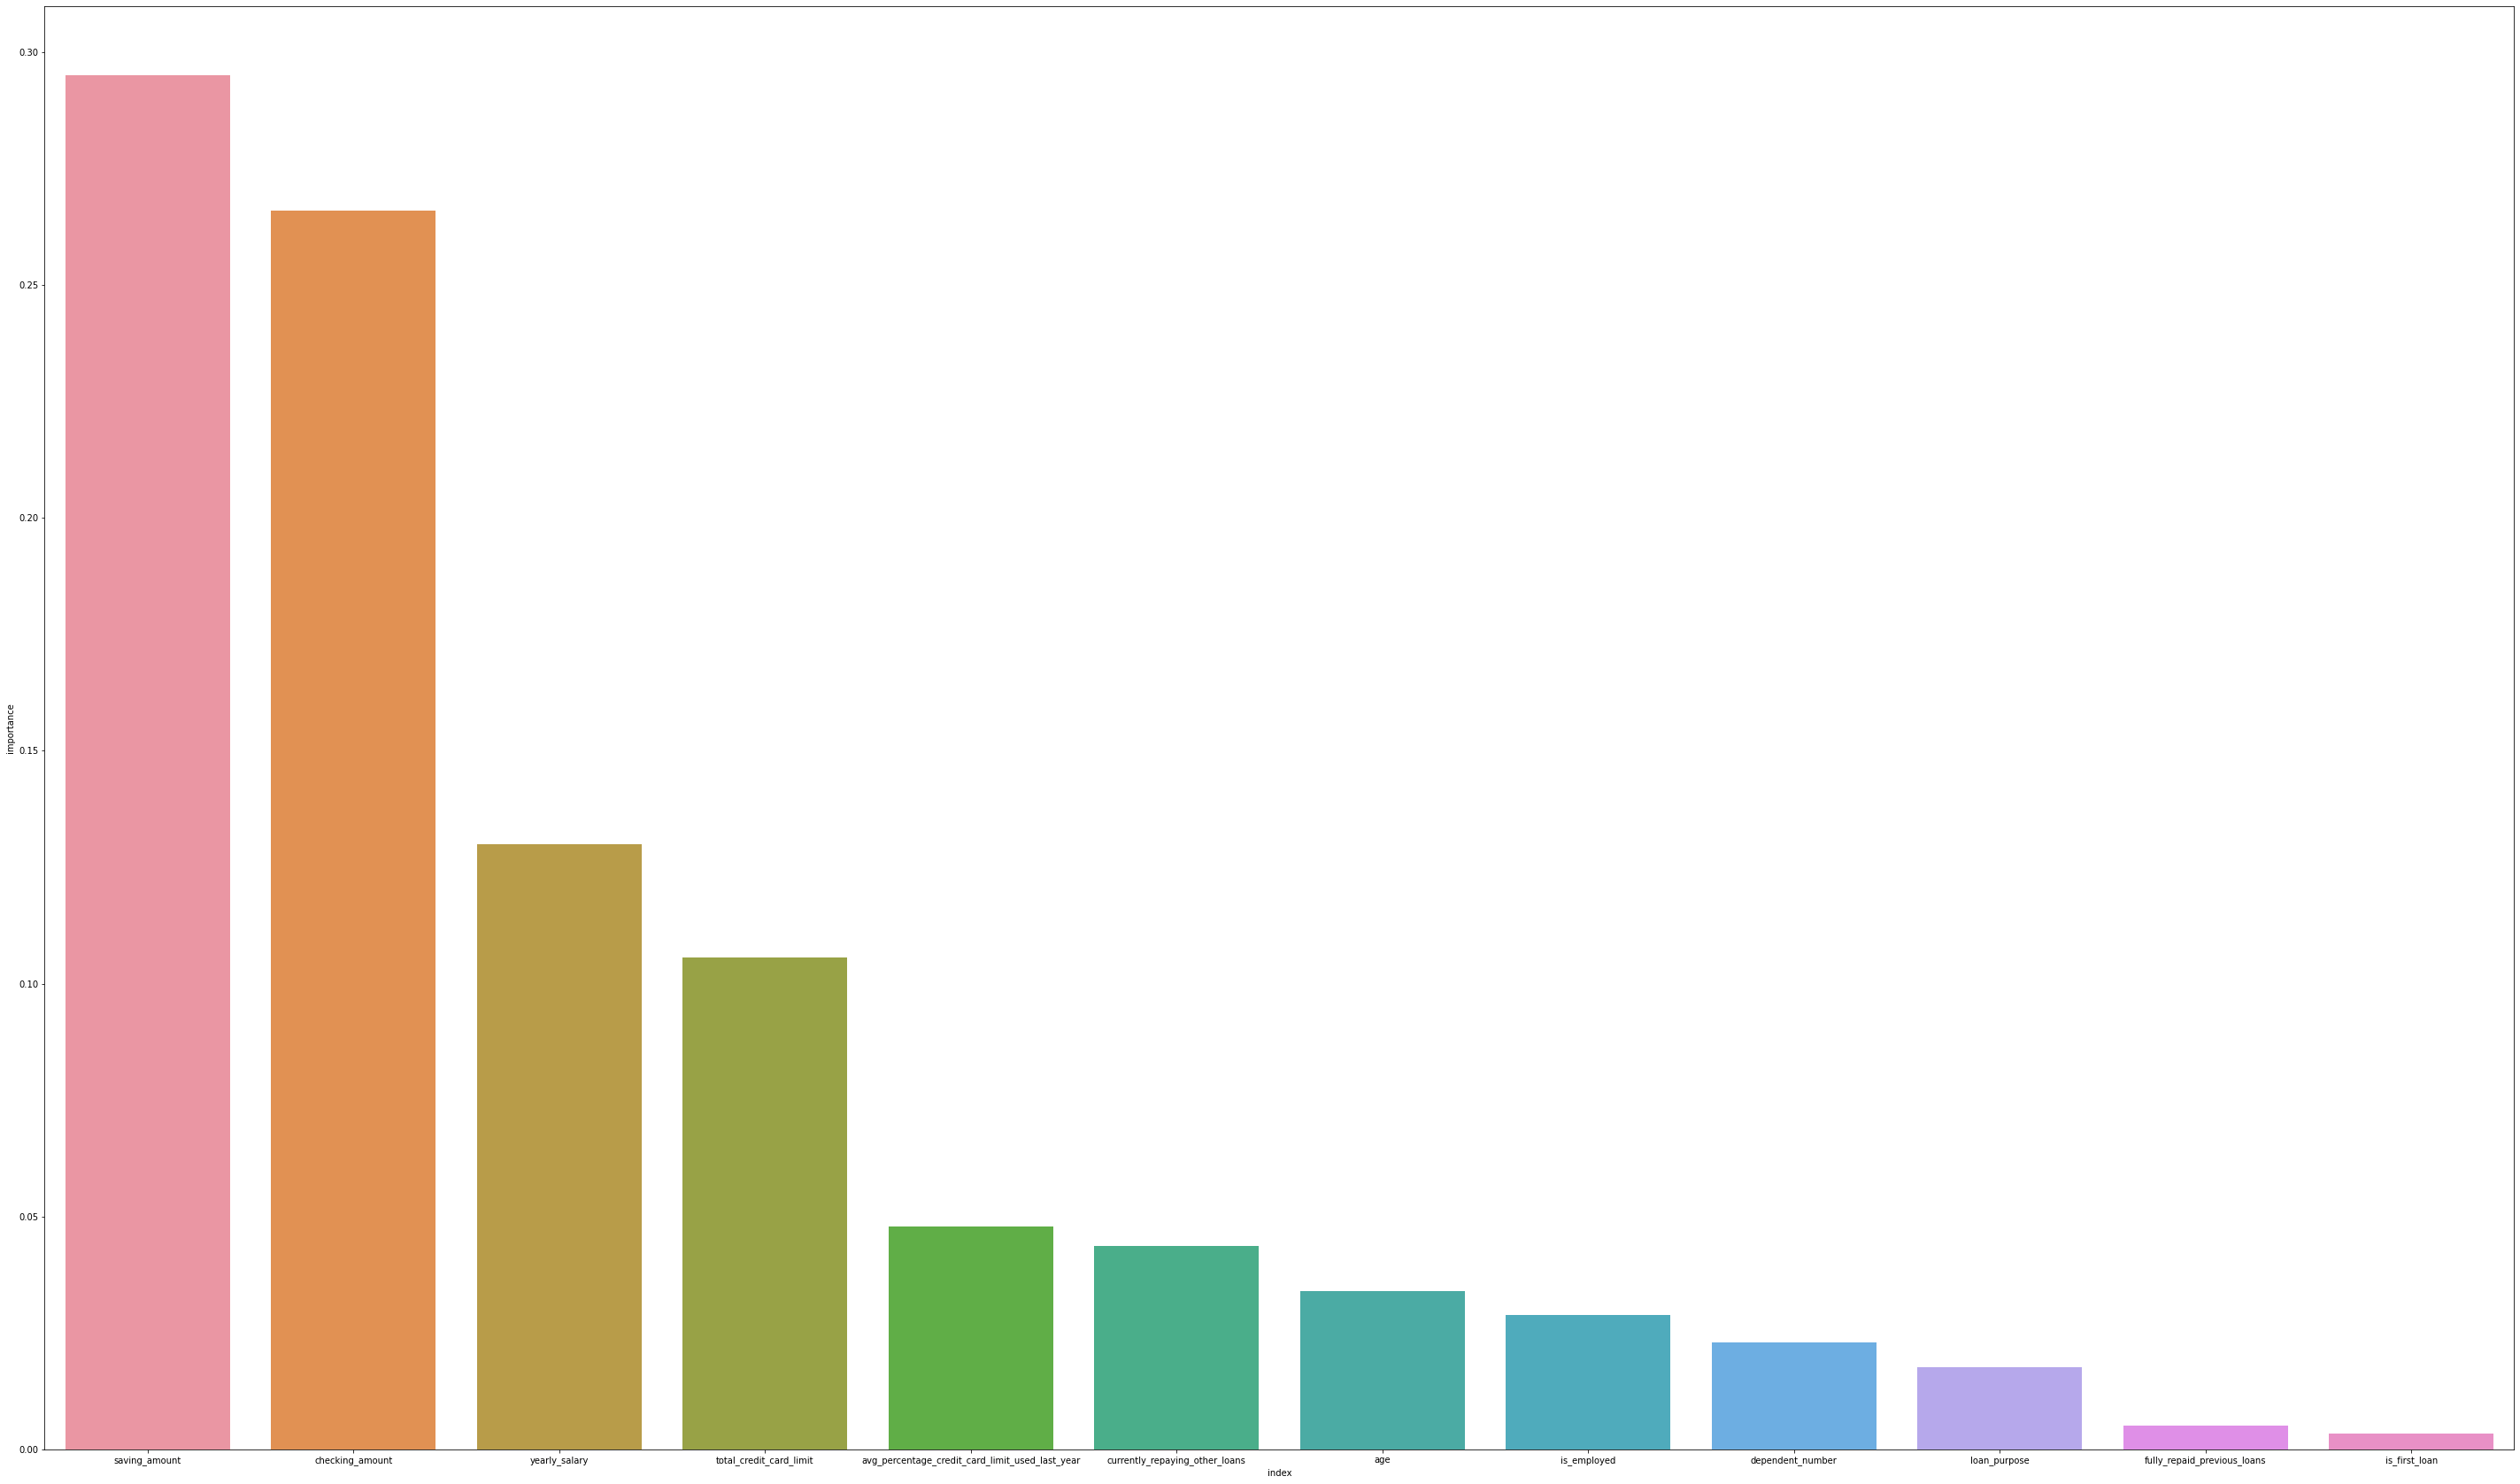

In [354]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(50, 30))
sns.barplot(x='index', y = 'importance', data=feature_importances, ax = ax)

The most important varaible is the saving_amount, total saving account balance when he/she asked for the loan

The is_employed feature is not that important in our model, however if someone salary features has value 0 , it means that their not employed. So these two features are incoprated to each other. And yearly_salary is important, so is_employed is crucial as well.

# Q4
Are there any other variables, not in the data provided, that you'd have liked to include in
the model?

REF: https://github.com/JifuZhao/DS-Take-Home/blob/master/12.%20Loan%20Granting.ipynb
-Marriage status.

Because even a borrow cannot repay, if he/she is married, his/her spouse can help to repay.

-Housing status, has his/her own house, or rent appartments? if renting, how much is monthly rent?

Because even the borrower cannot repay, if he/she has house, the house can be sold to repay the debt

-Educational level

Normally a person who received higher education, has stronger capability to earn money to repay, and has higher moral standard to repay.